## Method component factualness evaluation

In [1]:
import sys, os, json
from graphs.states import MCState
from main import method_factual_graph, learner_bg_graph, whoisthisfor_feedback_graph, competency_feedback_graph

with open("data/test_factualness_sample.json", "r", encoding="utf-8") as f:
    factualness_data = json.load(f)

with open("data/mc_sample.json", "r", encoding="utf-8") as f:
    mc_sample_data = json.load(f)
# Display the loaded data
print("== factualness data ==")
print(f"Loaded {len(factualness_data)} items")
print(f"First item keys: {factualness_data[0].keys() if factualness_data else 'No data'}")

print("\n== mc sample data ==")
print(f"Loaded {len(mc_sample_data)} items")
print(f"First item keys: {mc_sample_data[0].keys() if mc_sample_data else 'No data'}")

== factualness data ==
Loaded 1 items
First item keys: dict_keys(['id', 'method_component', 'reference'])

== mc sample data ==
Loaded 3 items
First item keys: dict_keys(['id', 'title', 'description', 'who', 'competency', 'key_method', 'method_component', 'assessment', 'Reference', 'Resource'])


In [2]:
# Preview data
fact_data_id = 1
mc_data_id = 1
fact_input = next((x for x in factualness_data if x["id"] == fact_data_id), None)
mc_input = next((x for x in mc_sample_data if x["id"] == mc_data_id), None)

In [3]:
state : MCState = {
    "learner_background": mc_input['who'],
    "knowledge_background": "",
    "micro_credentials": {
        "whoisthisfor_statement": mc_input['who'],
        "competency_statement": mc_input['competency'],
        "method_component": {
            "components": fact_input['method_component'],
            "reference": fact_input['reference']
        },
    },
    "eval_score": {
        "claims": [],  # empty list of Claim
        "method_groundness_score": 0.0,
        "method_faithfulness_score": 0.0,
        "dim_feedback": {
            "artifact": "",
            "feedback": {}  # empty dict for DimensionFeedback
        }
    }
}

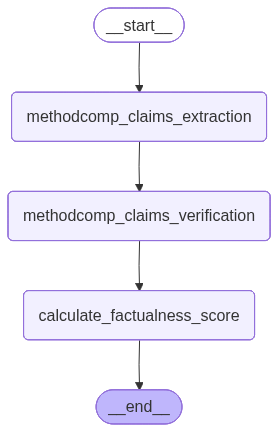

==method component==

1.1 Introduction to OCR technology
OCR(Optical Character Recognition) refers to the automatic recognition of text content in images,
and is one of the important branches of computer vision[4].Traditional OCR adopts pattern
recognition technology, which has many drawbacks such as too many processing links, long process,
poor recognition flexibility and difficult maintenance[5].In recent years, with the rapid development
of deep learning technology, the traditional OCR technology framework has been broken. OCR
technology based on deep learning has gradually become a research hotspot, and is widely used in
many fields such as electronic bill recognition, certificate recognition, license plate recognition,
natural scene text recognition and so on[5]
. Deep learning has strong image feature learning ability,
which optimizes the traditional technical framework to a certain extent and improves the recognition
effect and speed of OCR. Currently, the typical OCR recognitio

In [4]:
from IPython.display import display, Image
display(Image(method_factual_graph.get_graph().draw_mermaid_png()))

print('==method component==')
print(state['micro_credentials']['method_component']['components'])
print('==reference==')
print(state['micro_credentials']['method_component']['reference'])

In [ ]:
result = await method_factual_graph.ainvoke(state)
result['eval_score']

{'claims': [{'id': 1,
   'claim': 'OCR(Optical Character Recognition) refers to the automatic recognition of text content in images, and is one of the important branches of computer vision[4].',
   'source': 'Hongtao Lu, Mukun Luo. Survey on New Progresses of Deep Learning Based Computer Vision [J]. Journal of Data Acquisition and Processing, 2022, 37(2): 247-278.',
   'support': 'unknown'},
  {'id': 2,
   'claim': 'Traditional OCR adopts pattern recognition technology, which has many drawbacks such as too many processing links, long process, poor recognition flexibility and difficult maintenance[5].',
   'source': 'Rihua Wang. Research on Key Technologies and Application of Intelligent OCR Recognition Based on Deep Learning [J]. Designing Techniques of Posts and Telecommunications, 2021(08): 20-24.',
   'support': 'no'},
  {'id': 3,
   'claim': 'In recent years, with the rapid development of deep learning technology, the traditional OCR technology framework has been broken.',
   'sour

## Learner & Knowledge Background feedback
- return feedback and suggestion

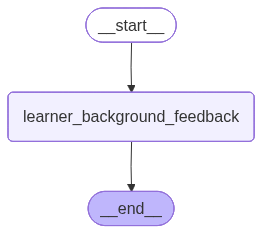

==learner background==
บุคลากรที่ต้องจัดการข้อมูลจากหลายแหล่ง เช่น Excel, CSV, หรือ DB Extract และต้องการเปลี่ยนข้อมูลดิบเหล่านั้นให้เป็นชุดข้อมูลที่สะอาด มีโครงสร้าง และพร้อมใช้งาน เพื่อสนับสนุนการวิเคราะห์ข้อมูลในงานของตนเอง หรือเพื่อส่งมอบให้แผนกอื่น เช่น ฝ่ายบริหาร ฝ่ายขาย หรือทีม Data/AI นำไปใช้ต่อในการสร้างผลลัพธ์ เช่น Dashboard, Report, Automation หรือเป็นข้อมูลตั้งต้นสำหรับโมเดล AI โดยเฉพาะในบริบทที่ข้อมูลต้องถูกส่งต่ออย่างถูกต้อง ชัดเจน และมีคุณภาพ เพื่อให้เกิดความต่อเนื่องในการทำงานระหว่างทีม


In [5]:
display(Image(learner_bg_graph.get_graph().draw_mermaid_png()))

print('==learner background==')
print(state['learner_background'])

In [6]:
result = await learner_bg_graph.ainvoke(state)
result['eval_score']['dim_feedback']

{'artifact': 'learner_bg',
 'feedback': {'profile_concisability_result': True,
  'profile_concisability_explanation': "คำอธิบายระบุชัดเจนว่าเป็น 'บุคลากรที่จัดการข้อมูลจากหลายแหล่ง' พร้อมยกตัวอย่างแหล่งข้อมูลและบริบทการใช้งาน ทำให้เข้าใจได้ง่ายและไม่คลุมเครือ",
  'profile_concisability_suggestions': [{'suggestion_topic': '',
    'suggested_version': ''}],
  'need_concisability_result': True,
  'need_concisability_explanation': 'ความต้องการระบุอย่างกระชับและเฉพาะเจาะจง — แปลงข้อมูลดิบให้เป็นชุดข้อมูลสะอาด มีโครงสร้าง และพร้อมส่งต่อ/ใช้งาน โดยเน้นความถูกต้อง ชัดเจน และคุณภาพเพื่อความต่อเนื่องของงานข้ามทีม',
  'need_concisability_suggestions': [{'suggestion_topic': '',
    'suggested_version': ''}]}}

## Artifact feedback
### Who is this for
- return total score & dimension result with explanation

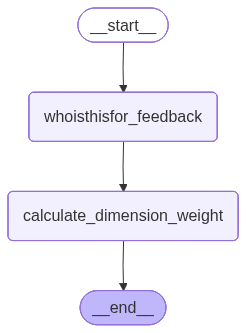

==who is this for==
บุคลากรที่ต้องจัดการข้อมูลจากหลายแหล่ง เช่น Excel, CSV, หรือ DB Extract และต้องการเปลี่ยนข้อมูลดิบเหล่านั้นให้เป็นชุดข้อมูลที่สะอาด มีโครงสร้าง และพร้อมใช้งาน เพื่อสนับสนุนการวิเคราะห์ข้อมูลในงานของตนเอง หรือเพื่อส่งมอบให้แผนกอื่น เช่น ฝ่ายบริหาร ฝ่ายขาย หรือทีม Data/AI นำไปใช้ต่อในการสร้างผลลัพธ์ เช่น Dashboard, Report, Automation หรือเป็นข้อมูลตั้งต้นสำหรับโมเดล AI โดยเฉพาะในบริบทที่ข้อมูลต้องถูกส่งต่ออย่างถูกต้อง ชัดเจน และมีคุณภาพ เพื่อให้เกิดความต่อเนื่องในการทำงานระหว่างทีม


In [7]:
display(Image(whoisthisfor_feedback_graph.get_graph().draw_mermaid_png()))
print('==who is this for==')
print(state['micro_credentials']['whoisthisfor_statement'])

In [8]:
result = await whoisthisfor_feedback_graph.ainvoke(state)
result['eval_score']['dim_feedback']

{'total_score': 10.0,
 'feedback': [{'dimension': 'profile_concisability',
   'result': True,
   'explanation': "คำอธิบายระบุอย่างชัดเจนว่าเป็น 'บุคลากรที่จัดการข้อมูลจากหลายแหล่ง' พร้อมตัวอย่างแหล่งข้อมูลและบริบทการใช้งาน จึงเฉพาะเจนและเข้าใจได้แม้ข้อความค่อนข้างยาวแต่ยังไม่คลุมเครือ"},
  {'dimension': 'need_concisability',
   'result': True,
   'explanation': 'ระบุปัญหา/ความต้องการอย่างชัดเจน: แปลงข้อมูลดิบให้เป็นชุดข้อมูลที่สะอาด มีโครงสร้าง และพร้อมใช้งานเพื่อสนับสนุนการวิเคราะห์หรือส่งมอบต่อ ซึ่งเป็นความต้องการที่เจาะจงและใช้งานได้จริง'},
  {'dimension': 'format_criteria',
   'result': True,
   'explanation': 'เขียนเป็นย่อหน้าอธิบายบทบาทและความรับผิดชอบ (role + need) ตามรูปแบบที่ต้องการ จึงมีโครงสร้างสอดคล้องกับข้อกำหนด'}],
 'artifact': 'whoisthisfor'}

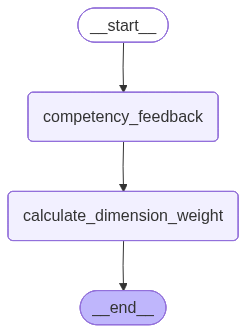

In [9]:
display(Image(competency_feedback_graph.get_graph().draw_mermaid_png()))

In [10]:
result = await competency_feedback_graph.ainvoke(state)
result['eval_score']['dim_feedback']

{'total_score': 7.5,
 'feedback': [{'dimension': 'concisability',
   'result': True,
   'explanation': "ประโยคสั้นและชัดเจน กล่าวถึงทักษะที่ผู้เรียนจะทำได้ (จัดเตรียมข้อมูลและอธิบายผลกระทบ) แต่ควรระบุผลลัพธ์เชิงวัดหรือชิ้นงานเป็นหลักฐาน เช่น 'ชุดข้อมูลที่สะอาด/รายงานสรุป' เพื่อชี้ชัดสิ่งที่จะมอบให้เมื่อจบหลักสูตร"},
  {'dimension': 'alignment',
   'result': True,
   'explanation': 'เนื้อหาสอดคล้องกับผู้เรียนที่ต้องจัดการข้อมูลจากหลายแหล่งและส่งมอบให้ทีมอื่น (เตรียมข้อมูลเพื่อตอบโจทย์ธุรกิจ และแสดงผลกระทบต่อการตัดสินใจ/กระบวนการ) แต่ควรเสริมหลักฐานทักษะที่เกี่ยวข้องกับการทำความสะอาดข้อมูล การจัดโครงสร้าง การตรวจสอบคุณภาพ และการส่งมอบ (ตัวอย่าง: dataset ที่สะอาด, data dictionary, data quality report) เพื่อเพิ่มความชัดเจน'},
  {'dimension': 'action_verb_criteria',
   'result': True,
   'explanation': "ใช้คำกริยาเชิงปฏิบัติ 'จัดเตรียม' และ 'อธิบาย' ซึ่งสอดคล้องกับกริยาจาก Bloom (ใกล้เคียงกับ 'create/apply' และ 'analyze/evaluate') หากต้องการตรงตามคำตัวอย่างใน Bloom ให้พิจารณาใช้คำว่า 'สร้าง